# sklearn中的逻辑回归

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))# 有200个样本，每个样本2个特征
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')
for _ in range(20): # 加入20个噪音
    y[np.random.randint(200)] = 1


In [10]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Text(0.5, 1.0, 'Parabolic curve decision boundary with noise')

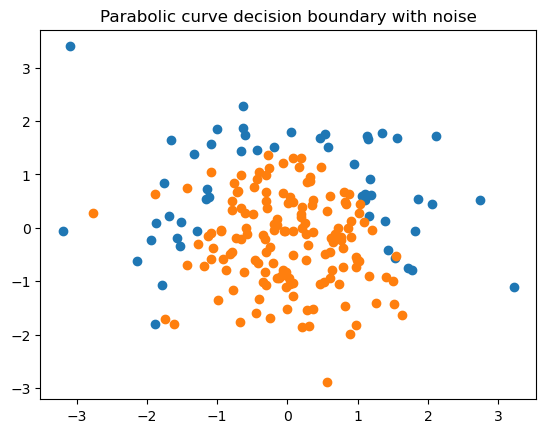

In [14]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("Parabolic curve decision boundary with noise")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
log_reg

LogisticRegression()

In [22]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [23]:
log_reg.score(X_test, y_test)

0.86

In [24]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1), 
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Text(0.5, 1.0, 'Linear Logistic regression')

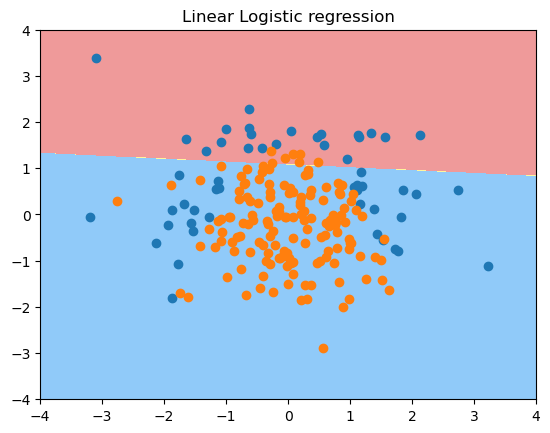

In [49]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title('Linear Logistic regression')

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [30]:
poly_log_reg = PolynomialLogisticRegression(degree=2)

In [32]:
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [33]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [34]:
poly_log_reg.score(X_test, y_test)

0.94

Text(0.5, 1.0, 'polinomial logistic regression with degree = 2')

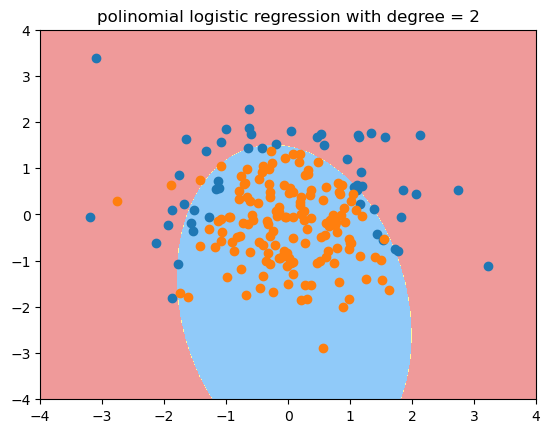

In [50]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("polinomial logistic regression with degree = 2")

# 高阶多项式 逻辑回归

In [36]:
poly_log_reg20 = PolynomialLogisticRegression(degree=20)
poly_log_reg20.fit(X_train, y_train)
poly_log_reg20.score(X_train, y_train)

0.94

In [37]:
poly_log_reg20.score(X_test, y_test)

0.92

Text(0.5, 1.0, 'polinomial logistic regression with degree = 20')

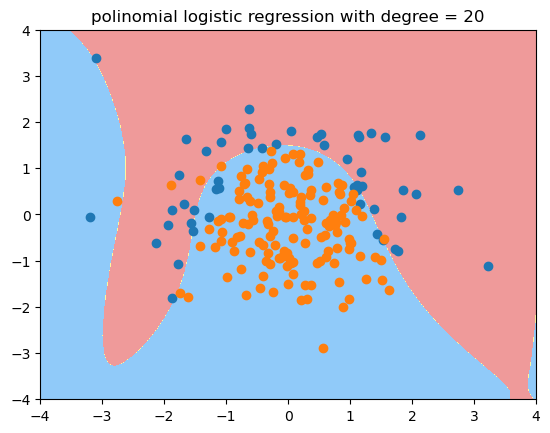

In [51]:
plot_decision_boundary(poly_log_reg20, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("polinomial logistic regression with degree = 20")

In [42]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C = C))
    ])
poly_log_regc = PolynomialLogisticRegression(degree=20, C=0.1)# 正则化权重大，分类损失函数权重小, 
poly_log_regc.fit(X_train, y_train)
poly_log_regc.score(X_train, y_train)
poly_log_regc.score(X_test, y_test)

0.92

In [43]:
poly_log_regc.score(X_train, y_train)

0.84

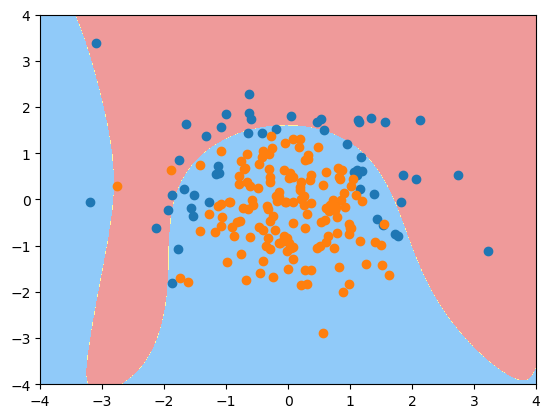

In [44]:
plot_decision_boundary(poly_log_regc, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


In [46]:
def PolynomialLogisticRegression(degree, C, penalty = 'l2', solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C = C, penalty = penalty, solver=solver))
    ])
poly_log_regc = PolynomialLogisticRegression(degree=20, C=0.1, penalty = 'l1', solver='liblinear')# 正则化权重大，分类损失函数权重小, 
poly_log_regc.fit(X_train, y_train)
poly_log_regc.score(X_train, y_train)
poly_log_regc.score(X_test, y_test)

0.9

In [47]:
poly_log_regc.score(X_train, y_train)

0.8266666666666667

Text(0.5, 1.0, 'polinomial logistic regression with degree=20, C=0.1, penalty=l1')

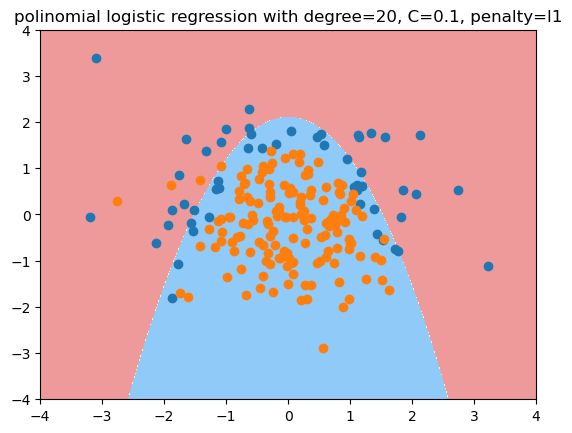

In [52]:
plot_decision_boundary(poly_log_regc, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("polinomial logistic regression with degree=20, C=0.1, penalty=l1")

In [53]:
def PolynomialLogisticRegression(degree, C, penalty = 'l2', solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C = C, penalty = penalty, solver=solver))
    ])
poly_log_regc = PolynomialLogisticRegression(degree=20, C=0.1, solver='liblinear')# 正则化权重大，分类损失函数权重小, 
poly_log_regc.fit(X_train, y_train)
poly_log_regc.score(X_train, y_train)
poly_log_regc.score(X_test, y_test)

0.92

Text(0.5, 1.0, 'polinomial logistic regression with degree=20, C=0.1')

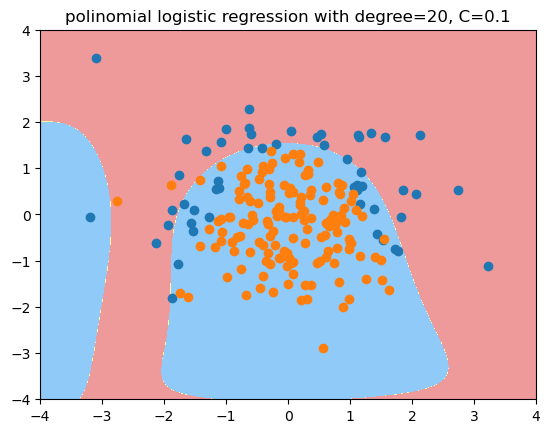

In [54]:
plot_decision_boundary(poly_log_regc, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.title("polinomial logistic regression with degree=20, C=0.1")